In [1]:
import numpy as np
import pandas as pd
import os
from num2words import num2words
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def howmanyholes():
    while True:
        num_holes = int(input('How many holes did you play? '))
        if num_holes not in (9, 18):
            print('Only enter 9 or 18 hole scores.')
        
        else:
            if num_holes == 9:
                sheets = ('9 Hole Master', '9 Hole Pars', '9 Hole FWYs', '9 Hole GIR', '9 Hole Putts', '9 Hole by Hole', '9 Hole Yardages', '9 Hole Handicaps', '9 Hole Courses', 'Course Yardage 9', 'Course Pars 9', 'Course Handicaps 9')
                files = ("9holemaster.csv", "9holepars.csv", "9holefwys.csv", "9holegir.csv", "9holeputts.csv", "9holescores.csv", 
                       "9holeyardages.csv", "9holehandicaps.csv", "9holecourses.csv","courseyardage9.csv","coursepars9.csv","coursehandicaps9.csv")
            
            elif num_holes == 18:
                sheets = ('18 Hole Master', '18 Hole Pars', '18 Hole FWYs', '18 Hole GIR', '18 Hole Putts', '18 Hole by Hole', '18 Hole Yardages', '18 Hole Handicaps', '18 Hole Courses', 'Course Yardage 18', 'Course Pars 18', 'Course Handicaps 18')
                files = ("18holemaster.csv", "18holepars.csv", "18holefwys.csv", "18holegir.csv", "18holeputts.csv", "18holescores.csv", 
                       "18holeyardages.csv", "18holehandicaps.csv", "18holecourses.csv","courseyardage18.csv","coursepars18.csv","coursehandicaps18.csv")
                    
            ####     if reading from excel     ####
#             master_df = pd.read_excel("Golf Stats '23.xlsx", sheets[0], index_col = 'Round')
#             pars_df = pd.read_excel("Golf Stats '23.xlsx", sheets[1], index_col = 'Round')
#             fwys_df = pd.read_excel("Golf Stats '23.xlsx", sheets[2], index_col = 'Round')
#             gir_df = pd.read_excel("Golf Stats '23.xlsx", sheets[3], index_col = 'Round')
#             putts_df = pd.read_excel("Golf Stats '23.xlsx", sheets[4], index_col = 'Round')
#             scores_df = pd.read_excel("Golf Stats '23.xlsx", sheets[5], index_col = 'Round')
#             yards_df = pd.read_excel("Golf Stats '23.xlsx", sheets[6], index_col = 'Round')
#             hdcps_df = pd.read_excel("Golf Stats '23.xlsx", sheets[7], index_col = 'Round')
#             courses_df = pd.read_excel("Golf Stats '23.xlsx", sheets[8])
#             courses_yards_df = pd.read_excel("Golf Stats '23.xlsx", sheets[9])
#             courses_pars_df = pd.read_excel("Golf Stats '23.xlsx", sheets[10])
#             courses_hdcps_df = pd.read_excel("Golf Stats '23.xlsx", sheets[11])
            
            ####     if reading from csv    ####
            full_path = '/Users/tristansetterdahl/Sports and Data Science/Personal Golf Stats/' + str(num_holes) + ' Hole Data/'
            
            master_df = pd.read_csv(full_path + files[0], index_col = 'Round')
            pars_df = pd.read_csv(full_path + files[1], index_col = 'Round')
            fwys_df = pd.read_csv(full_path + files[2], index_col = 'Round')
            gir_df = pd.read_csv(full_path + files[3], index_col = 'Round')
            putts_df = pd.read_csv(full_path + files[4], index_col = 'Round')
            scores_df = pd.read_csv(full_path + files[5], index_col = 'Round')
            yards_df = pd.read_csv(full_path + files[6], index_col = 'Round')
            hdcps_df = pd.read_csv(full_path + files[7], index_col = 'Round')
            courses_df = pd.read_csv(full_path + files[8])
            courses_yards_df = pd.read_csv(full_path + files[9])
            courses_pars_df = pd.read_csv(full_path + files[10])
            courses_hdcps_df = pd.read_csv(full_path + files[11])
            
            num_rounds = len(master_df) + 1
            
            print('This is your ' + num2words(num_rounds, lang = 'en', to = 'ordinal_num') + ' ' + str(num_holes) + ' hole round')            
            
            break
            
    return num_holes, num_rounds, master_df, pars_df, fwys_df, gir_df, putts_df, scores_df, yards_df, hdcps_df, courses_df, courses_yards_df, courses_pars_df, courses_hdcps_df, sheets


In [3]:
def courseinfo(courses_df):
#     print(master_df)
    while True:
        date = input('What date was the round? (mm/dd/yy) ')
        print(courses_df[['Course', 'Tees']])
        new_course = input('Select course, "new" if not in database ')
        #while true loop here for selection
        while True:
            if new_course.lower() == 'new':
                course = input('What course did you play? ')
                if course.lower() == 'cantigny':
                    cantigny_nines = input('Which Routing?\n1. Woodside/Lakeside\n2. Woodside/Hillside\n3. Lakeside/Hillside\n')
                tees = input('What tees did you play? ')
                course_yardage = int(input('What is the course yardage? '))
                rating = float(input('What is the course rating? '))
                slope = int(input('What is the course slope? '))
                break

            elif new_course.isnumeric() == True and int(new_course) < len(courses_df) and int(new_course) >= 0:
                course = courses_df.loc[int(new_course), 'Course']
                tees = courses_df.loc[int(new_course), 'Tees']
                course_yardage = courses_df.loc[int(new_course), 'Yardage']
                rating = courses_df.loc[int(new_course), 'Rating']
                slope = courses_df.loc[int(new_course), 'Slope']
                break

            else:
                print('Select existing course or create a new one. ')

        temp_lo = int(input('Low temperature during the round? '))
        temp_hi = int(input('High temperature during the round? '))
        wind_speed = int(input('Wind speed during the round? '))
        gust_speed = int(input('Gust speeds during the round? '))
        round_info = {'Date':date, 'Course':course, 'Tees':tees,
                                   'Yardage':course_yardage, 'Rating':rating, 'Slope':slope,
                                   'Low Temperature':temp_lo, 'High Temperature':temp_hi,
                     'Wind Speed':wind_speed, 'Gust Speed':gust_speed}
        print(round_info)
        cont = input('Is this correct? ')
        if cont.lower() == 'y':
            round_info = np.array([date, course, tees, course_yardage, rating, slope, temp_lo, temp_hi, wind_speed,
                         gust_speed])
            courses_df.loc[len(courses_df)] = np.array([course, tees, course_yardage, rating, slope])
            break
        else:
            print('Ok, redo it')
        
    return new_course, course, tees, round_info


In [4]:
def holebyhole(new_course, course, tees, round_info, num_rounds, num_holes, courses_hdcps_df, courses_yards_df, courses_pars_df,
              hdcps_df, yards_df, pars_df, fwys_df, gir_df, putts_df, scores_df):
    hole = 0
    last_hole = 'Hole ' + str(num_holes)
    round_dic = {'Course':course}
    if new_course.lower() == 'new':
        round_hdcps = np.array([course])
        round_yards = np.array([course, tees])
        round_pars = np.array([course])
    else:
        round_hdcps = courses_hdcps_df.loc[(courses_hdcps_df.Course == course), 'Course':last_hole].to_numpy()[0]
        round_yards = courses_yards_df.loc[(courses_yards_df.Course == course) & (courses_yards_df.Tees == tees), 'Course':last_hole].to_numpy()[0]
        round_pars = courses_pars_df.loc[(courses_hdcps_df.Course == course), 'Course':last_hole].to_numpy()[0]
    round_fwys = np.array([course])
    round_girs = np.array([course])
    round_putts = np.array([course])
    round_scores = np.array([course])
    
    total_par = 0
    while hole < num_holes:
        
        while True:
            
            if new_course.lower() == 'new':
                hdcp = int(input('Hole ' + str(hole +1 ) + ' handicap '))
                hole_yards = int(input('Hole ' + str(hole + 1) + ' yardage '))
                hole_par = int(input('Hole ' + str(hole + 1) + ' par '))
                total_par = total_par + hole_par
            else:
                hdcp = round_hdcps[hole + 1]
                hole_yards = round_yards[hole + 2]
                hole_par = round_pars[hole + 1]
            if hole_par == 3:
                hole_fwy = 'NA'
            else:
                hole_fwy = input('Hole ' + str(hole + 1) + ' fairway? (Y/L/R/S/D, NA for par 3s) ')
            hole_gir = input('Hole ' + str(hole + 1) + ' green in regulation? (Y/L/R/S/D) ')
            hole_putts = int(input('Hole ' + str(hole + 1) + ' putts '))
            hole_score = int(input('Hole ' + str(hole + 1) + ' score '))
            which_hole = 'hole ' + str(hole + 1)
            hole_info = {'HDCP':hdcp, 'Yargage':hole_yards, 'Par':hole_par,
                                   'FWY':hole_fwy, 'GIR':hole_gir, 'Putts':hole_putts,
                                   'Score':hole_score}
            print(hole_info)
            cont = input('Is this correct? ')
            if cont.lower() == 'y':
                if new_course.lower() == 'new':
                    round_hdcps = np.append(round_hdcps, hdcp)
                    round_yards = np.append(round_yards, hole_yards)
                    round_pars = np.append(round_pars, hole_par)
                round_fwys = np.append(round_fwys, hole_fwy)
                round_girs = np.append(round_girs, hole_gir)
                round_putts = np.append(round_putts, hole_putts)
                round_scores = np.append(round_scores, hole_score)
                round_dic[which_hole] = hole_info
                break
            else:
                print('Ok, redo it.')
        hole += 1
    
    round_ls = [round_hdcps, round_yards, round_pars, round_fwys, round_girs, round_putts, round_scores]
    hdcps_df.loc[len(hdcps_df)] = round_hdcps
    yards_df.loc[len(yards_df)] = round_yards
    pars_df.loc[len(pars_df)] = round_pars
    fwys_df.loc[len(fwys_df)] = round_fwys
    gir_df.loc[len(gir_df)] = round_girs
    putts_df.loc[len(putts_df)] = round_putts
    scores_df.loc[len(scores_df)] = round_scores
    if new_course.lower() == 'new':
        courses_hdcps_df.loc[len(courses_hdcps_df)] = round_hdcps
        courses_yards_df.loc[len(courses_yards_df)] = np.append(round_yards, round_info[3])
        courses_pars_df.loc[len(courses_pars_df)] = np.append(round_pars, total_par)
    

    return round_dic, round_ls, round_scores, round_pars, round_putts, round_fwys, round_girs


In [5]:
def roundstats(round_dic, round_ls, round_scores, round_pars, round_putts, round_fwys, round_gir, round_info, num_holes, master_df):
    round_scores_np = np.array(round_scores[1:]).astype(int)
    round_pars_np = np.array(round_pars[1:]).astype(int)
    round_putts_np = np.array(round_putts[1:]).astype(int)
    #to account for 9 hole and 18 hole rounds
    if num_holes == 18:
#         front_score = np.sum(round_scores_np[0:9])
#         back_score = np.sum(round_scores_np[9:])
        scores_arr = np.array([np.sum(round_scores_np[0:9]), np.sum(round_scores_np[9:]), np.sum(round_scores_np[0:])])
#     score = np.sum(round_scores[0:])
    else:
        scores_arr = np.array([np.sum(round_scores_np[0:])])
    diff = np.sum(round_scores_np[1:]) - round_info[4].astype(float)
    diff = round(diff, 2)
    hole_diffs = round_scores_np - round_pars_np #scores to par on each hole
    eagles = int(sum(np.less_equal(hole_diffs, -2)))
    birdies = int(sum(np.equal(hole_diffs, -1)))
    pars = int(sum(np.equal(hole_diffs, 0)))
    bogies = int(sum(np.equal(hole_diffs, 1)))
    doubles = int(sum(np.greater_equal(hole_diffs, 2)))
    fwys = int(sum(round_fwys == 'Y'))
    fwy_per = fwys / (num_holes - sum(np.equal(round_pars_np, 3)))
    fwy_per = round(fwy_per, 2)
    gir = int(sum(round_gir == 'Y'))
    gir_per = gir / num_holes
    gir_per = round(gir_per, 2)
    putts = int(sum(round_putts_np))
    putts3 = int(sum(np.equal(round_putts_np, 3)))
    
    
    #finding indexes for par 3s, 4s, 5s
    par3_idxs = np.where(round_pars_np == 3)
    par4_idxs = np.where(round_pars_np == 4)
    par5_idxs = np.where(round_pars_np == 5)
    
    #diff and averages 
    par3_diff = int(sum(np.subtract(round_scores_np[par3_idxs], 3)))
    par4_diff = int(sum(np.subtract(round_scores_np[par4_idxs], 4)))
    par5_diff = int(sum(np.subtract(round_scores_np[par5_idxs], 5)))
    
    par3_avg = round(np.average(round_scores_np[par3_idxs]), 2)
    par4_avg = round(np.average(round_scores_np[par4_idxs]), 2)
    par5_avg = round(np.average(round_scores_np[par5_idxs]), 2)
    
   
    master_arr_v1 = np.array([diff, eagles, birdies, pars, bogies, doubles,
                                  fwys, fwy_per, gir, gir_per, putts, putts3,
                                  par3_diff, par3_avg, par4_diff, par4_avg, par5_diff, par5_avg])
#     print(master_arr_v1)
    
    master_arrv2 = np.append(scores_arr, master_arr_v1)
#     print(master_arrv2)
    
    master_arr = np.append(round_info, master_arrv2)
#     print(master_arr)
    
    master_df.loc[len(master_df)] = master_arr


In [6]:
def getScore():
    num_holes, num_rounds, master_df, pars_df, fwys_df, gir_df, putts_df, scores_df, yards_df, hdcps_df, courses_df, courses_yards_df, courses_pars_df, courses_hdcps_df, sheets = howmanyholes()
    
    new_course, course, tees, round_info = courseinfo(courses_df)
    
    round_dic, round_ls, round_scores, round_pars, round_putts, round_fwys, round_gir = holebyhole(new_course, course, tees, round_info, num_rounds, num_holes, courses_hdcps_df, courses_yards_df, courses_pars_df,
              hdcps_df, yards_df, pars_df, fwys_df, gir_df, putts_df, scores_df)
    
    roundstats(round_dic, round_ls, round_scores, round_pars, round_putts, round_fwys, round_gir, round_info, num_holes, master_df)
    
    final_dfs = (master_df, pars_df, fwys_df, gir_df, putts_df, scores_df, yards_df,
                 hdcps_df, courses_df, courses_yards_df, courses_pars_df, courses_hdcps_df)
    
    if num_holes == 9:
        named_csv_ls = ("9holemaster.csv", "9holepars.csv", "9holefwys.csv", "9holegir.csv", "9holeputts.csv", "9holescores.csv", 
                       "9holeyardages.csv", "9holehandicaps.csv", "9holecourses.csv","courseyardage9.csv","coursepars9.csv","coursehandicaps9.csv")
    else:
        named_csv_ls = ("18holemaster.csv", "18holepars.csv", "18holefwys.csv", "18holegir.csv", "18holeputts.csv", "18holescores.csv", 
                       "18holeyardages.csv", "18holehandicaps.csv", "18holecourses.csv","courseyardage18.csv","coursepars18.csv","coursehandicaps18.csv")
        
    for i in range(len(final_dfs)):
        if i < 8:
            index_name = 'Round'
        else:
            index_name = False
        df = final_dfs[i]
        full_path = str(num_holes) + ' Hole Data/'
        path = '/Users/tristansetterdahl/Sports and Data Science/Personal Golf Stats/' + full_path + named_csv_ls[i]
        df.to_csv(path, index = index_name)
        
    round_summary(num_holes)
    
    

How many holes did you play? 18
This is your 11th 18 hole round
What date was the round? (mm/dd/yy) 07/24/23
                   Course          Tees
0   Village Links 18 Hole         Black
1   Village Links 18 Hole          Blue
2   Village Links 18 Hole         White
3   Village Links 18 Hole          Gold
4   Village Links 18 Hole           Red
5   Glen Oak Country Club  Championship
6   Glen Oak Country Club        Member
7           TPC Deere Run          Blue
8   Glen Oak Country Club  Championship
9   Glen Oak Country Club  Championship
10              Dubsdread          Blue
11    Old Wayne Golf Club          Blue
Select course, "new" if not in database 8
Low temperature during the round? 82
High temperature during the round? 88
Wind speed during the round? 5
Gust speeds during the round? 15
{'Date': '07/24/23', 'Course': 'Glen Oak Country Club', 'Tees': 'Championship', 'Yardage': 6841, 'Rating': 73.2, 'Slope': 139, 'Low Temperature': 82, 'High Temperature': 88, 'Wind Speed': 5,

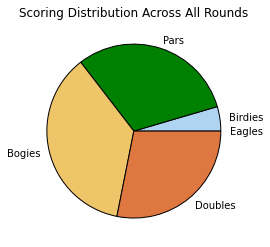

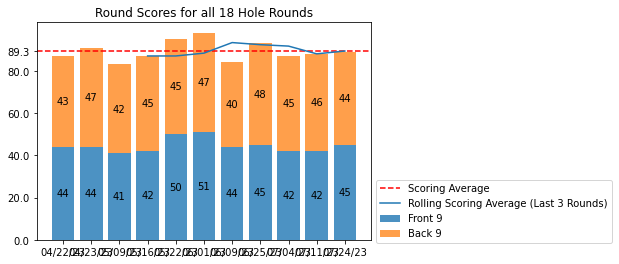

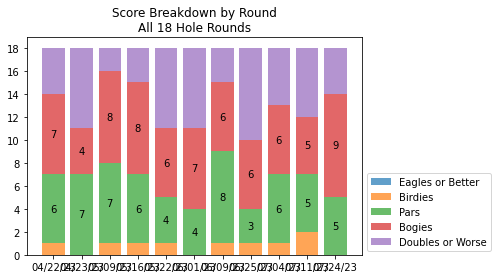

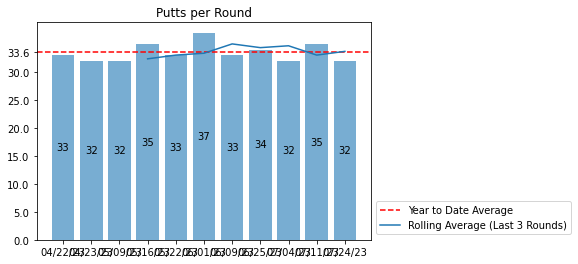

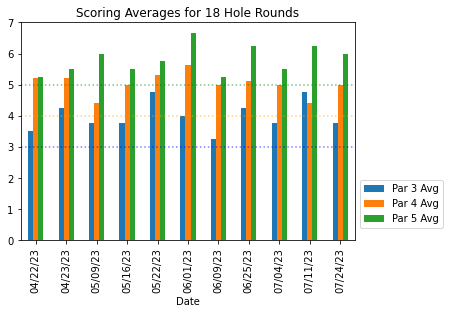

In [22]:
getScore()

In [180]:
master = pd.read_csv('18holemaster.csv', index_col = 'Round')

In [17]:
def round_summary(num_holes):
    if num_holes == 18:
        master = pd.read_csv('18 Hole Data/18holemaster.csv')
        alt_master = pd.read_csv('9 Hole Data/9holemaster.csv')
    else:
        alt_master = pd.read_csv('18 Hole Data/18holemaster.csv')
        master = pd.read_csv('9 Hole Data/9holemaster.csv')
    score_pie(master, alt_master)
    rounds_bars(master, num_holes)
    round_scores_breakdown(master, num_holes)
    putts_bars(master)
    scoring_avgs_viz(master, num_holes)
#     fwy_viz()
#     gir_viz()



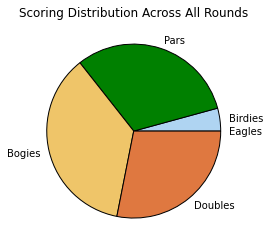

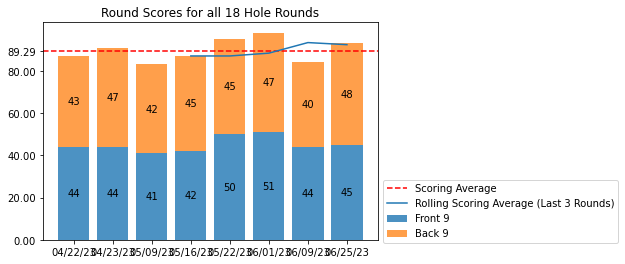

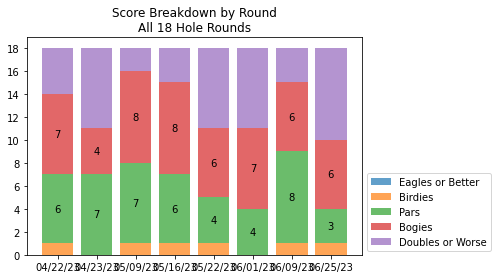

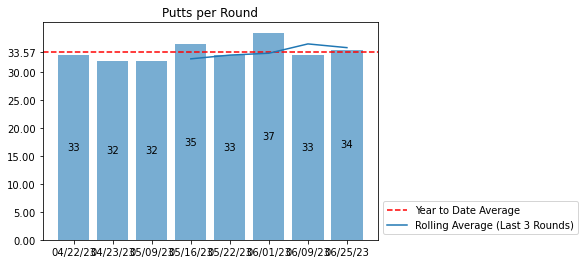

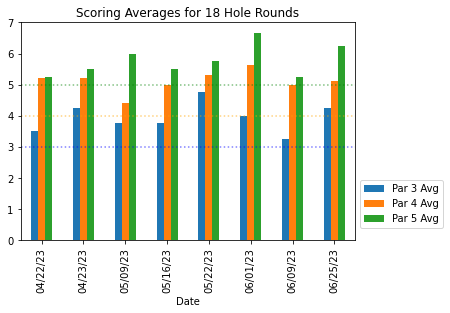

In [18]:
round_summary(18)

In [10]:
def score_pie(master, alt_master):
    year_eagles = sum(sum(master['Eagles or Better'], alt_master['Eagles or Better']))
    year_birdies = sum(sum(master['Birdies'], alt_master['Birdies']))
    year_pars = sum(sum(master['Pars'], alt_master['Pars']))
    year_bogies = sum(sum(master['Bogies'], alt_master['Bogies']))
    year_doubles = sum(sum(master['Doubles or Worse'], alt_master['Doubles or Worse']))
    score_pie = plt.pie([year_eagles, year_birdies, year_pars,
           year_bogies, year_doubles], 
           labels = ['Eagles', 'Birdies', 'Pars', 'Bogies', 'Doubles'], colors = ['#6bb8e1', '#afd4f2', 'green', '#efc569', '#df7840'],
           wedgeprops={"edgecolor":"k",'linewidth': 1, 'linestyle': 'solid', 'antialiased': True})
    plt.title('Scoring Distribution Across All Rounds')
    plt.show()


In [11]:
score_pie(master, pd.read_csv('9holemaster.csv'))

NameError: name 'master' is not defined

In [12]:
def rounds_bars(master, num_holes):
    if num_holes == 18:
        f9 = plt.bar(master['Date'], master['Front Nine Score'], alpha = .8, label = 'Front 9')
        b9 = plt.bar(master['Date'], master['Back Nine Score'], bottom = master['Front Nine Score'], alpha = .75, label = 'Back 9')
    
        plt.bar_label(f9, label_type = 'center')
        plt.bar_label(b9, label_type = 'center')
        prior_avg = np.mean(master['Total Score'][:-1])
        plt.yticks([0, 20, 40, 60, 80, prior_avg])
        rolling_avgs = master['Total Score'].shift(1).rolling(window = 3).mean() #rolling average of last three rounds
    
    else:
        f9 = plt.bar(master['Date'], master['Score'], alpha = .8)
        
        plt.bar_label(f9, label_type = 'center')
        prior_avg = np.mean(master['Score'][:-1])
        plt.yticks([0, 20, 40, prior_avg])
        rolling_avgs = master['Score'].shift(1).rolling(window = 3).mean() #rolling average of last three rounds
        
    prior_avg_line = plt.axhline(y = prior_avg, color = 'r', linestyle = 'dashed', label = 'Scoring Average') #finds the average for rounds before most recent and draws on the graph
    
    
    rolling_avg = plt.plot(master['Date'], rolling_avgs, label = "Rolling Scoring Average (Last 3 Rounds)")
    plt.legend(bbox_to_anchor = (1, 0.3))
    plt.title('Round Scores for all ' + str(num_holes) + ' Hole Rounds')
    plt.show()

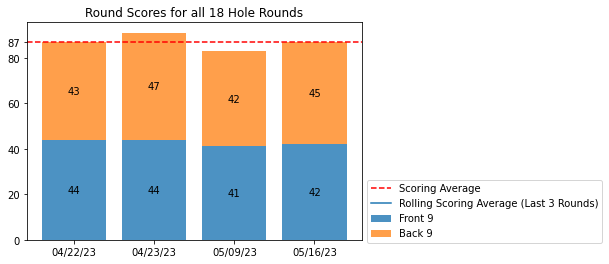

In [730]:
rounds_bars(pd.read_csv('18holemaster.csv'), 18)

In [13]:
def round_scores_breakdown(master, num_holes):
    bar_eagles = plt.bar(master['Date'], master['Eagles or Better'], label = 'Eagles or Better', alpha = .7)
    bar_birdies = plt.bar(master['Date'], master['Birdies'], bottom = master['Eagles or Better'], label = 'Birdies', alpha = .7)
    bar_pars = plt.bar(master['Date'], master['Pars'], bottom = master['Birdies'] + master['Eagles or Better'], label = 'Pars', alpha = .7)
    bar_bogies = plt.bar(master['Date'], master['Bogies'], bottom = master['Pars'] + master['Birdies'] + master['Eagles or Better'], label = 'Bogies', alpha = .7)
    bar_doubles = plt.bar(master['Date'], master['Doubles or Worse'], bottom = master['Bogies'] + master['Pars'] + master['Birdies'] + master['Eagles or Better'], label = 'Doubles or Worse', alpha = .7)
    
    plt.bar_label(bar_pars, label_type = 'center')
    plt.bar_label(bar_bogies, label_type = 'center')

    plt.yticks(np.arange(0, num_holes + 2, 2))
    plt.legend(bbox_to_anchor = (1, 0.4))
    plt.title('Score Breakdown by Round\nAll ' + str(num_holes) + ' Hole Rounds')
    plt.show()

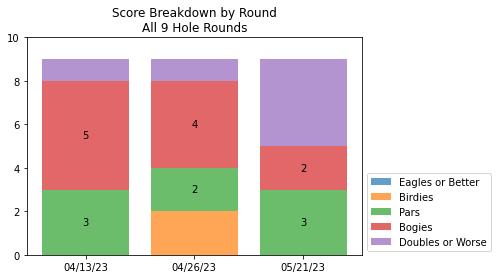

In [736]:
round_scores_breakdown(pd.read_csv('9holemaster.csv'), 9)

In [14]:
def putts_bars(master):
    bars = plt.bar(master['Date'], master['Putts'], alpha = .6)
    prior_avg = np.mean(master['Putts'][:-1])
    prior_avg_line = plt.axhline(y = prior_avg, color = 'r', linestyle = 'dashed', label = 'Year to Date Average') #finds the average for rounds before most recent and draws on the graph
    rolling_avgs = master['Putts'].shift(1).rolling(window = 3).mean() #rolling average of last three rounds
    rolling_avg = plt.plot(master['Date'], rolling_avgs, label = "Rolling Average (Last 3 Rounds)")
    plt.yticks(np.append(np.arange(0, 35, 5), prior_avg))
    plt.title('Putts per Round')
    plt.bar_label(bars, label_type = 'center')
    plt.legend(bbox_to_anchor = (1, 0.2))


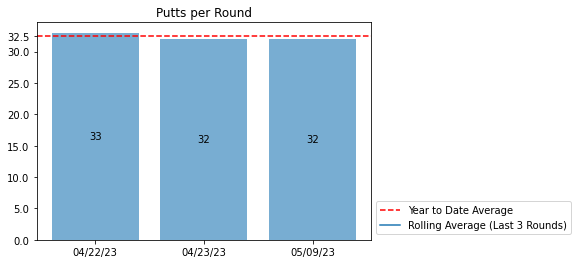

In [529]:
putts_bars(master)

In [15]:
def gir_viz():
    gir_9_hole = np.array(pd.read_csv('9 Hole Data/9holegir.csv', index_col = 'Round').loc[:, 'Hole 1':])
    gir_18_hole = np.array(pd.read_csv('18 Hole Data/18holegir.csv', index_col = 'Round').loc[:, 'Hole 1':])
    gir_results = np.append(gir_9_hole, gir_18_hole)
    gir_no_null = gir_results[~pd.isnull(gir_results)]

    hit_per = np.average(np.equal(gir_no_null, 'Y'))
    deep_per = np.average(np.equal(gir_no_null, 'D'))
    short_per = np.average(np.equal(gir_no_null, 'S'))
    left_per = np.average(np.equal(gir_no_null, 'L'))
    right_per = np.average(np.equal(gir_no_null, 'R'))

    explosions = [deep_per, left_per, short_per, right_per]
    miss_labels = ['Long\n' + '{:.1%}'.format(deep_per), 'Left\n' + '{:.1%}'.format(left_per), 'Short\n' + '{:.1%}'.format(short_per), 'Right\n' + '{:.1%}'.format(right_per)]
    gir_size = [1]

    # Plot
    plt.pie([1, 1, 1, 1], labels = miss_labels, colors = ['red', 'red', 'red', 'red'], startangle = 45, frame = True,
           explode = explosions)

    plt.pie(gir_size, colors= 'green', radius = hit_per, labels = ['GIR\n' + '{:.1%}'.format(hit_per)], textprops = dict(rotation_mode = 'anchor', ha='center'))

    plt.title('Approach Results Across All Rounds')
#     plt.axis('equal')
#     plt.tight_layout()
#     plt.show()

In [46]:
###use this framework for a fwy visual
def fwy_viz():
    fwys_9_hole = np.array(pd.read_csv('9 Hole Data/9holefwys.csv', index_col = 'Round').loc[:, 'Hole 1':])
    fwys_18_hole = np.array(pd.read_csv('18 Hole Data/18holefwys.csv', index_col = 'Round').loc[:, 'Hole 1':])
    fwy_results = np.append(fwys_9_hole, fwys_18_hole)
    fwys_no_null = fwy_results[~pd.isnull(fwy_results)]

    hit_per = np.average(np.equal(fwys_no_null, 'Y'))
    deep_per = np.average(np.equal(fwys_no_null, 'D'))
    short_per = np.average(np.equal(fwys_no_null, 'S'))
    left_per = np.average(np.equal(fwys_no_null, 'L'))
    right_per = np.average(np.equal(fwys_no_null, 'R'))



    miss_labels = ['Long\n' + '{:.1%}'.format(deep_per), 'Left\n' + '{:.1%}'.format(left_per), 'Short\n' + '{:.1%}'.format(short_per), 'Right\n' + '{:.1%}'.format(short_per)]
    explosions = [deep_per, left_per, short_per, right_per]
    miss_sizes = [.1, .4, .1, .4]
    fwy_size = [1]

    # Plot
    plt.pie(miss_sizes, labels = miss_labels, colors = ['red', 'red', 'red', 'red'], startangle = 72, frame = True,
        explode = explosions)

    plt.pie(fwy_size, colors = 'green', radius = hit_per, labels = ['FWY\n' + '{:.1%}'.format(hit_per)])
    # centre_circle = plt.Circle((0,0),0.5,color='black', fc='white',linewidth=0)

    plt.title('Results of Tee Shots Across All Rounds')
#     plt.axis('equal')
#     plt.tight_layout()
#     plt.show()

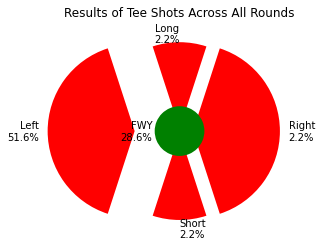

In [802]:
fwy_viz()


In [16]:
def scoring_avgs_viz(master, num_holes):
    par3_color = 'blue'
    par4_color = 'orange'
    par5_color = 'green'
    master.loc[:,('Date', 'Par 3 Avg', 'Par 4 Avg', 'Par 5 Avg')].plot(x = 'Date', kind = 'bar',
             title = 'Scoring Averages for ' + str(num_holes) + ' Hole Rounds')
    plt.axhline(y = 3, linestyle = 'dotted', color = par3_color, alpha = .5)
    plt.axhline(y = 4, linestyle = 'dotted', color = par4_color, alpha = .5)
    plt.axhline(y = 5, linestyle = 'dotted', color = par5_color, alpha = .5)
    plt.legend(bbox_to_anchor = (1, .3))
    


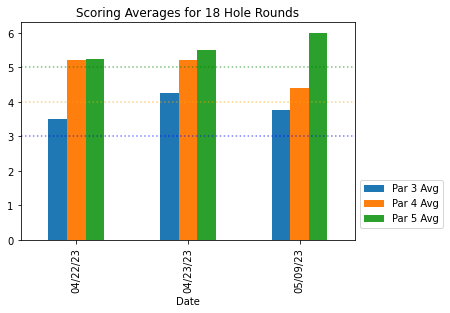

In [742]:
scoring_avgs_viz(master, 18)

In [132]:
gir_9_hole = np.array(pd.read_csv('9 Hole Data/9holegir.csv', index_col = 'Round').loc[:, 'Hole 1':])
gir_18_hole = np.array(pd.read_csv('18 Hole Data/18holegir.csv', index_col = 'Round').loc[:, 'Hole 1':])
gir_results = np.append(gir_9_hole, gir_18_hole)
gir_no_null = gir_results[~pd.isnull(gir_results)]
gir_idxs = np.where(gir_no_null == 'Y')[0]

putts_9_holes = np.array(pd.read_csv('9 Hole Data/9holeputts.csv', index_col = 'Round').loc[:, 'Hole 1':])
putts_18_holes = np.array(pd.read_csv('18 Hole Data/18holeputts.csv', index_col = 'Round').loc[:, 'Hole 1':])
putts_results = np.append(putts_9_holes, putts_18_holes)
putts_no_null = putts_results[~pd.isnull(putts_results)]
putts_when_gir = putts_no_null[gir_idxs]
putts_per_gir = np.average(putts_when_gir)


fwys_9_hole = np.array(pd.read_csv('9 Hole Data/9holefwys.csv', index_col = 'Round').loc[:, 'Hole 1':])
fwys_18_hole = np.array(pd.read_csv('18 Hole Data/18holefwys.csv', index_col = 'Round').loc[:, 'Hole 1':])
fwy_results = np.append(fwys_9_hole, fwys_18_hole)
fwys_no_null = fwy_results[~pd.isnull(fwy_results)]
fwy_idxs = np.where(fwy_results == 'Y')[0]
par_3_idxs = np.where(pd.isnull(fwy_results))
green_light = np.sort(np.append(fwy_idxs, par_3_idxs))

fwy_per = np.average(np.equal(fwys_no_null, 'Y'))
gir_per = np.average(np.equal(gir_no_null, 'Y'))

green_light_approach = gir_no_null[green_light]
gir_per_green_light = np.average(np.equal(green_light_approach, 'Y'))